### Importing Libraries

In [49]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

In [50]:
!nvidia-smi

Sun Nov 26 17:20:38 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    33W /  70W |   8697MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Data colection and preprocessing

In [51]:
df= pd.read_csv("mail_data.csv")

In [52]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [53]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [55]:
df.Category.unique()

array(['ham', 'spam'], dtype=object)

In [56]:
# Converting spam to 1 and ham to 0

df.Category.replace(['spam', 'ham'], [1,0], inplace= True)

In [57]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [58]:
df[df.Category==1]

,Category,Message
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [59]:
df.Category.value_counts()

0    4825
1     747
Name: Category, dtype: int64

<Axes: xlabel='Category', ylabel='count'>

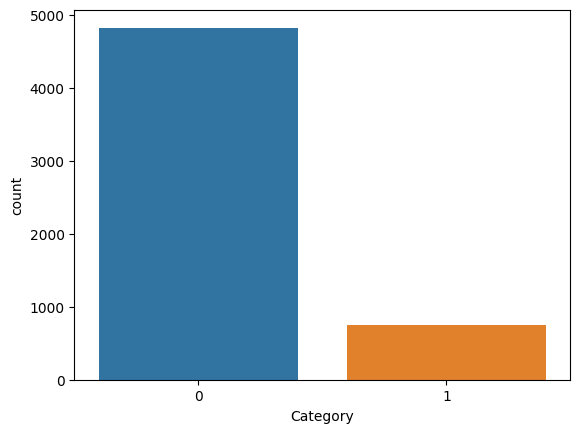

In [60]:
sns.countplot(data= df, x='Category')

In [61]:
# Seperating x and y

x= df['Message']
y= df['Category']

### Data Splitting

In [62]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=42)

In [63]:
x_train.shape, x_test.shape

((4457,), (1115,))

### Feature extraction

In [64]:
# We are transforming the text data into feature vectors, that can be used as input to the model.

extractor= TfidfVectorizer(min_df=1, stop_words='english', lowercase= True)

In [65]:
x_train_features= extractor.fit_transform(x_train)
x_test_features= extractor.transform(x_test)

In [66]:
y_test

3245    0
944     0
1044    0
2484    0
812     0
       ..
4264    0
2439    0
5556    0
4205    0
4293    0
Name: Category, Length: 1115, dtype: int64

In [67]:
print(x_train_features)

  (0, 5818)	0.22682143517864364
  (0, 2497)	0.2442158912653505
  (0, 694)	0.3171299579602537
  (0, 6264)	0.1898892037332199
  (0, 5800)	0.17558937755823417
  (0, 3262)	0.33791755486732394
  (0, 2049)	0.3034375179183143
  (0, 7300)	0.24288153842988894
  (0, 2724)	0.3544175987866074
  (0, 354)	0.3544175987866074
  (0, 7162)	0.2550284465664535
  (0, 258)	0.2379428657041507
  (0, 7222)	0.2173884735352799
  (0, 5512)	0.1898892037332199
  (1, 2555)	0.3840709491751004
  (1, 3804)	0.1902902346515268
  (1, 3932)	0.24325511357721427
  (1, 4509)	0.4028245991060671
  (1, 2440)	0.33870544648398715
  (1, 3333)	0.20665394084233096
  (1, 5650)	0.360444144470318
  (1, 2335)	0.2162321275166079
  (1, 6738)	0.28986069568918
  (1, 6109)	0.3239762634465801
  (1, 3267)	0.2678713077029217
  :	:
  (4452, 2438)	0.4574160733416501
  (4452, 7280)	0.3968991650168732
  (4452, 3978)	0.4574160733416501
  (4452, 3290)	0.26370969643076225
  (4452, 3084)	0.22948428918295163
  (4452, 2236)	0.2676662072392096
  (4453, 387

### Training the model

In [68]:
model= LogisticRegression()

In [69]:
model.fit(x_train_features, y_train)

LogisticRegression()

### Model Evaluation

In [70]:
# Prediction on training data

train_pred= model.predict(x_train_features)

In [71]:
train_accuracy= accuracy_score(y_train, train_pred)

In [72]:
train_accuracy

0.9661207089970832

In [73]:
test_pred= model.predict(x_test_features)

In [74]:
test_accuracy= accuracy_score(y_test, test_pred)

In [75]:
test_accuracy

0.967713004484305

In [76]:
print(confusion_matrix(y_test, test_pred))

[[966   0]
 [ 36 113]]


In [77]:
#   Here,

#   TP is 113 [ correctly identified spams (1)]
#   TN is 966 [ correctly identified hams (0)]
#   FP is 0   [ wrongly said positives (said 1 [spam] intead of 0 [ham]]
#   FN is 36  [ wrongly said negatives (said 0 [ham] instead of 1[spam])]

In [78]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.76      0.86       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



#### Here we dont want the machine to classify ham into spam ie, 0 into 1. which means that we are more concerned about FP rather than FN. So precision is important here, and our model works good in that regards

In [52]:
def checker(true_cat,pred_cat):

  for index, (true, pred) in enumerate(zip(y_test, test_pred)):
    if true == true_cat and pred== pred_cat:
      print(f"index: {index}   True: {true}   Pred: {pred}")


checker(1,1)

index: 14   True: 1   Pred: 1
index: 24   True: 1   Pred: 1
index: 47   True: 1   Pred: 1
index: 51   True: 1   Pred: 1
index: 60   True: 1   Pred: 1
index: 62   True: 1   Pred: 1
index: 70   True: 1   Pred: 1
index: 72   True: 1   Pred: 1
index: 73   True: 1   Pred: 1
index: 75   True: 1   Pred: 1
index: 115   True: 1   Pred: 1
index: 129   True: 1   Pred: 1
index: 146   True: 1   Pred: 1
index: 166   True: 1   Pred: 1
index: 167   True: 1   Pred: 1
index: 208   True: 1   Pred: 1
index: 211   True: 1   Pred: 1
index: 221   True: 1   Pred: 1
index: 236   True: 1   Pred: 1
index: 238   True: 1   Pred: 1
index: 240   True: 1   Pred: 1
index: 243   True: 1   Pred: 1
index: 251   True: 1   Pred: 1
index: 259   True: 1   Pred: 1
index: 260   True: 1   Pred: 1
index: 291   True: 1   Pred: 1
index: 297   True: 1   Pred: 1
index: 299   True: 1   Pred: 1
index: 314   True: 1   Pred: 1
index: 338   True: 1   Pred: 1
index: 357   True: 1   Pred: 1
index: 393   True: 1   Pred: 1
index: 395   True:

In [53]:
def mail_check(n):

  print(f"mail: {x_test.iloc[n]}")
  print(f"True_label: {y_test.iloc[n]}")
  print(f"Pred_label: {test_pred[n]}")

In [54]:
mail_check(993)

mail: YES! The only place in town to meet exciting adult singles is now in the UK. Txt CHAT to 86688 now! 150p/Msg.
True_label: 1
Pred_label: 1


In [55]:
y_test.iloc[40]

1

### Building the predictive system

In [56]:
input_mail=["""Hey I'm Hari speaking this side, how are you"""]

In [57]:
in_data= extractor.transform(input_mail)

In [58]:
prediction= model.predict(in_data)

In [59]:
prediction[0]

0

In [60]:
def spam_checker(mail):
  in_data= extractor.transform([mail])
  prediction= model.predict(in_data)
  if prediction[0]==0:
    return ('Ham')
  else:
    return ('Spam')

In [61]:
spam_checker('YES! The only place in town to meet exciting adult singles is now in the UK. Txt CHAT to 86688 now! 150p/Msg')

'Spam'

## **Now we try the same using DistilBERT**

- It's recomended to use GoogleCollab GPU runtime or any other GPU instances to run the codes below

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

In [15]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### Converting variables

In [16]:
x = list(df['Message'])
y =  list(df['Category'])

### Train Test Eval split

In [17]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)
x_eval, x_test, y_eval, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

### 1. Importing the Model and Tokenizer

In [18]:
from transformers import DistilBertTokenizer

model_name = "distilbert-base-uncased"
tokenizer = DistilBertTokenizer.from_pretrained(model_name)

### 2. Tokenizing the Data:

In [19]:
train_encodings= tokenizer(x_train, truncation=True, padding= True)
eval_encodings= tokenizer(x_eval, truncation=True, padding= True)
test_encodings= tokenizer(x_test, truncation=True, padding= True)

### 3. Converting to Dataset Objects:

In [20]:
# Converting the encodings into Dataset objects

import tensorflow as tf

train_dataset= tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    y_train
))

test_dataset= tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    y_test

))

eval_dataset= tf.data.Dataset.from_tensor_slices((
    dict(eval_encodings),
    y_eval

))

### 4. Defining Training Arguments:

In [21]:
from transformers import TFTrainer, TFTrainingArguments, TFDistilBertForSequenceClassification

training_args= TFTrainingArguments(
    output_dir= './results',
    num_train_epochs= 2,
    per_device_train_batch_size= 8,
    per_device_eval_batch_size= 16,
    warmup_steps= 500,
    weight_decay= 0.01,
    logging_dir= './logs',
    logging_steps= 10,
    eval_steps= 500
)

### 5. Retraining the Model:

In [22]:
with training_args.strategy.scope():
  model= TFDistilBertForSequenceClassification.from_pretrained(model_name)


trainer= TFTrainer(
    model= model,
    args= training_args,
    train_dataset= train_dataset,
    eval_dataset= eval_dataset,
)

trainer.train()

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

### 6. Evaluation of the model

In [25]:
trainer.evaluate(test_dataset)

{'eval_loss': 0.024528072561536517}

In [26]:
trainer.predict(test_dataset)

PredictionOutput(predictions=array([[ 3.3246794, -3.1915092],
       [ 3.3422108, -3.2003033],
       [ 3.327844 , -3.1577656],
       ...,
       [-3.3670561,  2.776779 ],
       [ 2.2141883, -2.0321043],
       [ 3.3276732, -3.1595066]], dtype=float32), label_ids=array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
    

In [27]:
# Here we only need label_id as our output.

output= trainer.predict(test_dataset)[1]

In [28]:
# Evaluation

from sklearn.metrics import confusion_matrix, classification_report

cm_distilBERT= confusion_matrix(y_test, output)
cr_distilBERT= classification_report(y_test, output)

In [29]:
# Accuracy

test_accuracy_distilBERT= accuracy_score(y_test, output)

In [30]:
test_accuracy_distilBERT

1.0

In [79]:
# Confusion matrix

cm_distilBERT

array([[481,   0],
       [  0,  77]])

In [80]:
# Classification Report

print(cr_distilBERT)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       481
           1       1.00      1.00      1.00        77

    accuracy                           1.00       558
   macro avg       1.00      1.00      1.00       558
weighted avg       1.00      1.00      1.00       558



Now our accuracy and everything is 100% which is actually very much good and far better than our logistic regression model.

## Now let's try the same using XLNet

**If you are running the codes in google Collab free version, please restart the kernal or you may face memory error**

In [1]:
!nvidia-smi

Sun Nov 26 16:54:26 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P8    13W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Importing necessary libraries

In [79]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

In [80]:
df= pd.read_csv("mail_data.csv")

In [81]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Converting into onehot encodings

In [82]:
df.Category.replace(['spam', 'ham'], [1,0], inplace= True)

In [83]:
x = list(df['Message'])
y =  list(df['Category'])

In [84]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)
x_eval, x_test, y_eval, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [90]:
# We need the below for XLNettokenizer to work

#!pip  install transformers[sentencepiece]

### Initialising a suitable XLNet model and tokenizer

In [91]:
from transformers import XLNetTokenizer

model_name = "textattack/xlnet-base-cased-SST-2"
tokenizer = XLNetTokenizer.from_pretrained(model_name)

### Tokenizing

In [86]:
train_encodings= tokenizer(x_train,  padding= True)
eval_encodings= tokenizer(x_eval,  padding= True)
test_encodings= tokenizer(x_test,  padding= True)

### Converting into Dataset objects

In [87]:
# Converting the encodings into Dataset objects

import tensorflow as tf

train_dataset= tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    y_train
))

test_dataset= tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    y_test

))

eval_dataset= tf.data.Dataset.from_tensor_slices((
    dict(eval_encodings),
    y_eval

))

### Initialising TrainingArguments

In [88]:
from transformers import TFTrainer, TFTrainingArguments, TFXLNetForSequenceClassification

training_args= TFTrainingArguments(
    output_dir= './results',
    num_train_epochs= 2,
    per_device_train_batch_size= 8,
    per_device_eval_batch_size= 16,
    warmup_steps= 500,
    weight_decay= 0.01,
    logging_dir= './logs',
    logging_steps= 10,
    eval_steps= 500
)

### Retraining the model

In [89]:
with training_args.strategy.scope():
  model= TFXLNetForSequenceClassification.from_pretrained(model_name, from_pt=True)


trainer= TFTrainer(
    model= model,
    args= training_args,
    train_dataset= train_dataset,
    eval_dataset= eval_dataset,
)

trainer.train()

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer TruncatedNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(
All PyTorch model weights were used when initializing TFXLNetForSequenceClassification.

All the weights of TFXLNetForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFXLNetForSequenceClassification for predictions without further training.
/usr/local/lib/python3.10/dist-packages/transformers/trainer_tf.py:118: FutureWarning: The class `TFTrainer` is deprecated and will be removed in version 5 of Transformers. We recommend using native Keras instead, by calling methods like `fit()`

### Evaluating the model

In [93]:
trainer.evaluate(test_dataset)

{'eval_loss': 0.053117261614118304}

In [94]:
trainer.predict(test_dataset)

PredictionOutput(predictions=array([[ 3.0124164, -4.0756636],
       [ 3.129069 , -4.1800156],
       [ 3.0878687, -4.2878013],
       ...,
       [-1.9030844,  2.102699 ],
       [ 3.534764 , -4.0552635],
       [ 3.231771 , -4.206071 ]], dtype=float32), label_ids=array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
    

In [95]:
# Here we only neede label_id as our output.

output= trainer.predict(test_dataset)[1]

In [96]:
# Evaluation

from sklearn.metrics import confusion_matrix, classification_report

cm_XLNet= confusion_matrix(y_test, output)
cr_XLNet= classification_report(y_test, output)
test_accuracy_XLNet= accuracy_score(y_test, output)

In [97]:
# Accuracy

test_accuracy_XLNet

1.0

In [98]:
# Confusion matrix

cm_XLNet

array([[481,   0],
       [  0,  77]])

In [99]:
# Classification Report

print(cr_XLNet)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       481
           1       1.00      1.00      1.00        77

    accuracy                           1.00       558
   macro avg       1.00      1.00      1.00       558
weighted avg       1.00      1.00      1.00       558



### Now our XLNet Model also performs very well, Thus proving the fact that LLMs are always superior in the Language Processing tasks